In [1]:
import requests 
import json 
import pandas as pd 
import numpy as np  
#import mysql.connector
import datetime as dt  
from operator import truediv
'''
mydb = mysql.connector.connect(host="193.151.131.38",user="predict_dataset",password="qazxsw123!@#",database="predict_dataset")

coin1='LTC'
coin2='USDT'
exch='binance'
df = pd.read_sql("SELECT * FROM exdata where coin1='"+coin1+"' AND coin2='"+coin2+"' AND exchange='"+exch+"' order by close_time desc",mydb)
mydb.close()
'''

'\nmydb = mysql.connector.connect(host="193.151.131.38",user="predict_dataset",password="qazxsw123!@#",database="predict_dataset")\n\ncoin1=\'LTC\'\ncoin2=\'USDT\'\nexch=\'binance\'\ndf = pd.read_sql("SELECT * FROM exdata where coin1=\'"+coin1+"\' AND coin2=\'"+coin2+"\' AND exchange=\'"+exch+"\' order by close_time desc",mydb)\nmydb.close()\n'

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df["open_time"]=pd.to_datetime(df.open_time/1000, unit='s')

df.index=df['open_time']

df=df.sort_index(ascending=True,axis=0)
df

,id,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,exchange,coin1,coin2
open_time,,,,,,,,,,,,,,,
2021-12-27 03:46:00,1993,2021-12-27 03:46:00,156.60,156.90,156.60,156.70,2163.393,1640576819999,339211.35800,260,2049.904,321422.29660,Binance,LTC,USDT
2021-12-27 03:47:00,1992,2021-12-27 03:47:00,156.80,156.90,156.70,156.90,658.301,1640576879999,103265.82580,106,623.404,97794.28910,Binance,LTC,USDT
2021-12-27 03:48:00,1991,2021-12-27 03:48:00,156.80,157.00,156.80,156.90,246.201,1640576939999,38628.26330,154,100.498,15768.32880,Binance,LTC,USDT
2021-12-27 03:49:00,1990,2021-12-27 03:49:00,156.90,156.90,156.80,156.90,185.978,1640576999999,29178.89930,49,52.947,8307.38430,Binance,LTC,USDT
2021-12-27 03:50:00,1989,2021-12-27 03:50:00,156.90,156.90,156.60,156.60,98.526,1640577059999,15442.86910,77,6.143,963.24320,Binance,LTC,USDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-10 04:53:00,4800463,2022-09-10 04:53:00,61.10,61.18,61.09,61.14,477.105,1662785639999,29176.83667,83,450.752,27565.77316,Binance,LTC,USDT
2022-09-10 04:54:00,4800490,2022-09-10 04:54:00,61.14,61.18,61.12,61.18,24.600,1662785699999,1504.05192,15,12.884,787.77589,Binance,LTC,USDT
2022-09-10 04:55:00,4800489,2022-09-10 04:55:00,61.19,61.21,61.14,61.17,544.656,1662785759999,33325.63565,92,365.733,22377.57433,Binance,LTC,USDT


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
 
 
from sklearn.preprocessing import MinMaxScaler

#convert UTC timezone to Tehran time
#df.open_time = df.open_time.dt.tz_localize('UTC').dt.tz_convert('Asia/Tehran')
#df

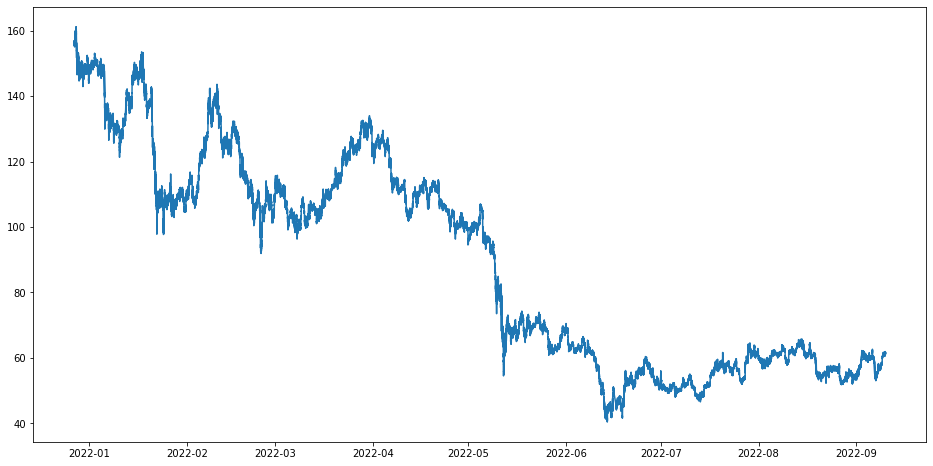

In [5]:
plt.figure(figsize=(16,8))
plt.plot(df["c"],label='سابقه قیمت لایت کوین')

In [6]:
df_rs = df.resample('7T', label='right', closed='right').agg({'o':'first','h':'max','l':'min','c':'last','v':'sum','num_trades':'sum','qav':'sum','taker_base_vol':'sum','taker_quote_vol':'sum'})
df_rs

,o,h,l,c,v,num_trades,qav,taker_base_vol,taker_quote_vol
open_time,,,,,,,,,
2021-12-27 03:51:00,156.60,157.00,156.60,156.70,3352.645,647,525765.76370,2833.142,444294.09020
2021-12-27 03:58:00,156.80,156.80,156.50,156.70,916.475,342,143510.62850,458.214,71764.94140
2021-12-27 04:05:00,156.60,156.70,156.20,156.20,1571.132,444,245787.10520,443.146,69363.34100
2021-12-27 04:12:00,156.30,156.40,156.10,156.30,555.308,224,86760.19670,265.701,41522.20010
2021-12-27 04:19:00,156.40,156.50,156.10,156.20,686.940,276,107419.23140,303.674,47499.31530
...,...,...,...,...,...,...,...,...,...
2022-09-10 04:29:00,61.65,61.66,61.52,61.54,981.261,225,60423.06163,314.797,19386.75502
2022-09-10 04:36:00,61.55,61.63,61.53,61.55,1235.851,260,76101.36561,212.495,13083.47650
2022-09-10 04:43:00,61.53,61.58,61.46,61.57,916.691,211,56401.18215,480.481,29561.81971


In [122]:
df_rs.isnull().sum()

o                  0
h                  0
l                  0
c                  0
v                  0
num_trades         0
qav                0
taker_base_vol     0
taker_quote_vol    0
dtype: int64

In [121]:
df_rs=df_rs[~np.isnan(df_rs).any(axis=1)]

In [123]:
df_rs

,o,h,l,c,v,num_trades,qav,taker_base_vol,taker_quote_vol
open_time,,,,,,,,,
2021-12-27 03:51:00,156.60,157.00,156.60,156.70,3352.645,647,525765.76370,2833.142,444294.09020
2021-12-27 03:58:00,156.80,156.80,156.50,156.70,916.475,342,143510.62850,458.214,71764.94140
2021-12-27 04:05:00,156.60,156.70,156.20,156.20,1571.132,444,245787.10520,443.146,69363.34100
2021-12-27 04:12:00,156.30,156.40,156.10,156.30,555.308,224,86760.19670,265.701,41522.20010
2021-12-27 04:19:00,156.40,156.50,156.10,156.20,686.940,276,107419.23140,303.674,47499.31530
...,...,...,...,...,...,...,...,...,...
2022-09-10 04:29:00,61.65,61.66,61.52,61.54,981.261,225,60423.06163,314.797,19386.75502
2022-09-10 04:36:00,61.55,61.63,61.53,61.55,1235.851,260,76101.36561,212.495,13083.47650
2022-09-10 04:43:00,61.53,61.58,61.46,61.57,916.691,211,56401.18215,480.481,29561.81971


In [124]:
scaler=MinMaxScaler(feature_range=(0,7))
scaled_data=scaler.fit_transform(df_rs)
#scaled_data=np.asarray(df_rs)

In [125]:
#len(scaled_data)
train_data=scaled_data[0:40000,:]
valid_data=scaled_data[40000:,:]

In [126]:
'''
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,:])
    y_train_data.append(scaled_data[i,0])
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],9))
'''
X_train = [] 
Y_train = []
train_data.shape[0]
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i])
    Y_train.append(train_data[i,3])
     
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(39940, 60, 9)

In [127]:
X_train[1,1,2]

6.738372093023257

In [31]:
import csv
with open('exdata.csv', newline='') as f:
    reader = csv.reader(f)
    myresult0 = list(reader)


myresult0=np.array(myresult0)
myresult0

array([['id', 'open_time', 'o', ..., 'exchange', 'coin1', 'coin2'],
       ['1993', '1640576760000', '156.6', ..., 'Binance', 'LTC', 'USDT'],
       ['1992', '1640576820000', '156.8', ..., 'Binance', 'LTC', 'USDT'],
       ...,
       ['11914689', '1696161360000', '67.44', ..., 'Binance', 'LTC',
        'USDT'],
       ['11914688', '1696161420000', '67.46', ..., 'Binance', 'LTC',
        'USDT'],
       ['11914687', '1696161480000', '67.45', ..., 'Binance', 'LTC',
        'USDT']], dtype='<U15')

In [47]:
df=pd.DataFrame(data=myresult0[1:,1:-3],             index=myresult0[1:,1],          columns=myresult0[0,1:-3])
df["open_time"]=pd.to_datetime(df.open_time.astype(float)/1000, unit='s')

df.index=df['open_time']

df=df.sort_index(ascending=True,axis=0)
df["o"]=df.o.astype(float)
df["h"]=df.h.astype(float)
df["c"]=df.c.astype(float)
df["l"]=df.l.astype(float)
df["v"]=df.v.astype(float)
df["qav"]=df.qav.astype(float)
df["num_trades"]=df.num_trades.astype(float)
df["taker_base_vol"]=df.taker_base_vol.astype(float)
df["taker_quote_vol"]=df.taker_quote_vol.astype(float)
df

,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol
open_time,,,,,,,,,,,
2021-12-27 03:46:00,2021-12-27 03:46:00,156.60,156.90,156.60,156.70,2163.393,1640576819999,339211.35800,260.0,2049.904,321422.29660
2021-12-27 03:47:00,2021-12-27 03:47:00,156.80,156.90,156.70,156.90,658.301,1640576879999,103265.82580,106.0,623.404,97794.28910
2021-12-27 03:48:00,2021-12-27 03:48:00,156.80,157.00,156.80,156.90,246.201,1640576939999,38628.26330,154.0,100.498,15768.32880
2021-12-27 03:49:00,2021-12-27 03:49:00,156.90,156.90,156.80,156.90,185.978,1640576999999,29178.89930,49.0,52.947,8307.38430
2021-12-27 03:50:00,2021-12-27 03:50:00,156.90,156.90,156.60,156.60,98.526,1640577059999,15442.86910,77.0,6.143,963.24320
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01 11:54:00,2023-10-01 11:54:00,67.47,67.47,67.41,67.42,132.637,1696161299999,8942.58033,47.0,44.501,3000.50936
2023-10-01 11:55:00,2023-10-01 11:55:00,67.42,67.48,67.42,67.44,445.585,1696161359999,30061.18761,73.0,273.277,18435.83875
2023-10-01 11:56:00,2023-10-01 11:56:00,67.44,67.47,67.44,67.46,127.692,1696161419999,8613.77209,34.0,86.903,5862.43945


In [48]:
df_rs = df.resample('7T', label='right', closed='right').agg({'o':'first','h':'max','l':'min','c':'last','v':'sum','num_trades':'sum','qav':'sum','taker_base_vol':'sum','taker_quote_vol':'sum'})
df_rs

,o,h,l,c,v,num_trades,qav,taker_base_vol,taker_quote_vol
open_time,,,,,,,,,
2021-12-27 03:51:00,156.60,157.00,156.60,156.70,3352.645,647.0,525765.76370,2833.142,444294.09020
2021-12-27 03:58:00,156.80,156.80,156.50,156.70,916.475,342.0,143510.62850,458.214,71764.94140
2021-12-27 04:05:00,156.60,156.70,156.20,156.20,1571.132,444.0,245787.10520,443.146,69363.34100
2021-12-27 04:12:00,156.30,156.40,156.10,156.30,555.308,224.0,86760.19670,265.701,41522.20010
2021-12-27 04:19:00,156.40,156.50,156.10,156.20,686.940,276.0,107419.23140,303.674,47499.31530
...,...,...,...,...,...,...,...,...,...
2023-10-01 11:31:00,67.31,67.41,67.31,67.41,2120.521,299.0,142839.37563,1591.670,107218.69491
2023-10-01 11:38:00,67.40,67.52,67.39,67.48,1858.447,362.0,125395.53599,1231.197,83076.07031
2023-10-01 11:45:00,67.48,67.62,67.48,67.59,2628.163,402.0,177553.95315,1850.271,125002.17993


In [49]:
df_rs=df_rs.fillna(method='ffill')

In [52]:
k = df_rs['c'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
d = df_rs['c'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s
# Add all of our new values for the MACD to the dataframe
df_rs['macd'] = df_rs.index.map(macd)
df_rs['macd_h'] = df_rs.index.map(macd_h)
df_rs['macd_s'] = df_rs.index.map(macd_s)

df_rs["price"]=np.array(df_rs["c"]).tolist()
df_rs2=df_rs[1:]
df_rs2["c"]=(((np.array(df_rs["c"][1:])/np.array(df_rs["c"][:-1]))-1)*100).tolist()
df=df_rs2[1:]
df["num_trades"]=(df["num_trades"]/2000)
df.loc[df["num_trades"]>1.0,"num_trades"]=1
print(int(max(df["v"])/12))
df["v"]=df["v"]/(int(max(df["v"])/12))
df.loc[df["v"]>1,"v"]=1
df["taker_base_vol"]=(df["taker_base_vol"]/10000)
df.loc[df["taker_base_vol"]>1.0,"taker_base_vol"]=1
df["h"]=df["h"]/df["price"]
df["l"]=df["l"]/df["price"]
df2 = np.asarray(df.drop(columns=['o','price','taker_quote_vol',"qav"]))
df2

19465


C:\Users\DABC\AppData\Local\Temp\ipykernel_4572\2046132239.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rs2["c"]=(((np.array(df_rs["c"][1:])/np.array(df_rs["c"][:-1]))-1)*100).tolist()
C:\Users\DABC\AppData\Local\Temp\ipykernel_4572\2046132239.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_trades"]=(df["num_trades"]/2000)
C:\Users\DABC\AppData\Local\Temp\ipykernel_4572\2046132239.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

array([[ 1.00320102,  1.        , -0.31908105, ...,         nan,
                nan,         nan],
       [ 1.0006398 ,  0.99872041,  0.06402049, ...,         nan,
                nan,         nan],
       [ 1.00192061,  0.9993598 , -0.06397953, ...,         nan,
                nan,         nan],
       ...,
       [ 1.00044385,  0.99837254,  0.16301126, ...,  0.27631247,
         0.01069804,  0.26561443],
       [ 1.00341145,  0.99985168, -0.2515165 , ...,  0.26721596,
         0.00128123,  0.26593473],
       [ 1.00088994,  0.99985168,  0.        , ...,  0.25704387,
        -0.00711269,  0.26415656]])

In [70]:
df2=df2[31:]
df=df[31:]

In [53]:
df2.shape

(132343, 9)

In [71]:
X_train = [] 
Y_train = []
for i in range(7, len(df2)):
    X_train.append(df2[i-7:i])
    Y_train.append(df2[i,3])
     
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [72]:
#Initialize the RNN
'''
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 9)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()
'''
model = Sequential()
model.add(layers.LSTM(30, activation = 'elu', return_sequences=True, input_shape=(X_train.shape[1], 9)))
model.add(Dropout(0.2))
model.add(layers.LSTM(30, activation = 'elu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(layers.LSTM(100, activation = 'elu', return_sequences=False))
model.add(Dropout(0.2))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 30)             4800      
                                                                 
 dropout_12 (Dropout)        (None, 7, 30)             0         
                                                                 
 lstm_13 (LSTM)              (None, 7, 30)             7320      
                                                                 
 dropout_13 (Dropout)        (None, 7, 30)             0         
                                                                 
 lstm_14 (LSTM)              (None, 7, 60)             21840     
                                                                 
 dropout_14 (Dropout)        (None, 7, 60)             0         
                                                                 
 lstm_15 (LSTM)              (None, 100)              

In [73]:
'''
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(x_train_data, y_train_data, epochs = 20, batch_size =60, validation_split=0.1)
'''
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 100, batch_size =10, validation_split=0.1)

Epoch 1/100
11908/11908 [==============================] - 197s 16ms/step - loss: 0.0185 - val_loss: 0.0171
Epoch 2/100
11908/11908 [==============================] - 173s 15ms/step - loss: 0.0172 - val_loss: 0.0173
Epoch 3/100
11908/11908 [==============================] - 201s 17ms/step - loss: 0.0168 - val_loss: 0.0171
Epoch 4/100
11908/11908 [==============================] - 190s 16ms/step - loss: 0.0167 - val_loss: 0.0167
Epoch 5/100
11908/11908 [==============================] - 204s 17ms/step - loss: 0.0166 - val_loss: 0.0176
Epoch 6/100
11908/11908 [==============================] - 203s 17ms/step - loss: 0.0165 - val_loss: 0.0167
Epoch 7/100
11908/11908 [==============================] - 248s 21ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 8/100
11908/11908 [==============================] - 218s 18ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 9/100
11908/11908 [==============================] - 238s 20ms/step - loss: 0.0163 - val_loss: 0.0170
Epoch 10/100
11908/11908 [==

In [74]:
model.save("saved_model_lstm_new_price.h5")

C:\Users\DABC\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
model = tf.keras.models.load_model('saved_model_lstm.h5')

In [3]:
model = tf.keras.models.load_model('saved_model_lstm_new_price.h5')

In [4]:
df = pd.read_csv("exdata-2w-test.csv")

df["open_time"]=pd.to_datetime(df.open_time/1000, unit='s')
df.index=df['open_time']
df=df.sort_index(ascending=True,axis=0)
df_rs = df.resample('7T', label='right', closed='right').agg({'o':'first','h':'max','l':'min','c':'last','v':'sum','num_trades':'sum','qav':'sum','taker_base_vol':'sum','taker_quote_vol':'sum'})
df_rs=df_rs.fillna(method='ffill')

k = df_rs['c'].ewm(span=12, adjust=False, min_periods=12).mean()
# Get the 12-day EMA of the closing price
d = df_rs['c'].ewm(span=26, adjust=False, min_periods=26).mean()
# Subtract the 26-day EMA from the 12-Day EMA to get the MACD
macd = k - d
# Get the 9-Day EMA of the MACD for the Trigger line
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
macd_h = macd - macd_s
# Add all of our new values for the MACD to the dataframe
df_rs['macd'] = df_rs.index.map(macd)
df_rs['macd_h'] = df_rs.index.map(macd_h)
df_rs['macd_s'] = df_rs.index.map(macd_s)

df_rs["price"]=np.array(df_rs["c"]).tolist()
df_rs2=df_rs[1:]
df_rs2["c"]=(((np.array(df_rs["c"][1:])/np.array(df_rs["c"][:-1]))-1)*100).tolist()
df=df_rs2[1:]
df["num_trades"]=(df["num_trades"]/2000)
df.loc[df["num_trades"]>1.0,"num_trades"]=1
print(int(max(df["v"])/12))
df["v"]=df["v"]/(int(max(df["v"])/12))
df.loc[df["v"]>1,"v"]=1
df["taker_base_vol"]=(df["taker_base_vol"]/10000)
df.loc[df["taker_base_vol"]>1.0,"taker_base_vol"]=1
df["h"]=df["h"]/df["price"]
df["l"]=df["l"]/df["price"]
df2 = np.asarray(df.drop(columns=['o','price','taker_quote_vol',"qav"]))
df2=df2[31:]
df=df[31:]
df2



5968


C:\Users\DABC\AppData\Local\Temp\ipykernel_21224\2916007324.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rs2["c"]=(((np.array(df_rs["c"][1:])/np.array(df_rs["c"][:-1]))-1)*100).tolist()
C:\Users\DABC\AppData\Local\Temp\ipykernel_21224\2916007324.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_trades"]=(df["num_trades"]/2000)
C:\Users\DABC\AppData\Local\Temp\ipykernel_21224\2916007324.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

array([[ 1.0001538 ,  0.99800062,  0.12319064, ...,  0.22635423,
         0.03787899,  0.18847524],
       [ 1.00153988,  0.99876809, -0.12303906, ...,  0.22943752,
         0.03276982,  0.1966677 ],
       [ 1.00107759,  0.99830665,  0.03079766, ...,  0.23083397,
         0.02733302,  0.20350095],
       ...,
       [ 1.00126843,  0.99984145,  0.03172086, ..., -0.0064058 ,
        -0.02662324,  0.02021744],
       [ 1.00047559,  0.99968294,  0.0158554 , ..., -0.00991698,
        -0.02410754,  0.01419055],
       [ 1.00031691,  0.99920773,  0.04755866, ..., -0.01016173,
        -0.01948183,  0.0093201 ]])

In [9]:
df

,o,h,l,c,v,num_trades,qav,taker_base_vol,taker_quote_vol,macd,macd_h,macd_s,price
open_time,,,,,,,,,,,,,
2023-08-23 00:23:00,64.92,1.000154,0.998001,0.123191,0.345444,0.1705,133948.77280,0.061884,40211.48392,0.226354,0.037879,0.188475,65.02
2023-08-23 00:30:00,65.02,1.001540,0.998768,-0.123039,0.315043,0.1635,122122.08398,0.107400,69753.21363,0.229438,0.032770,0.196668,64.94
2023-08-23 00:37:00,64.94,1.001078,0.998307,0.030798,0.485411,0.1990,188023.90267,0.129114,83814.12656,0.230834,0.027333,0.203501,64.96
2023-08-23 00:44:00,64.97,1.000462,0.997846,0.046182,1.000000,0.3125,985030.40296,1.000000,787422.38835,0.231691,0.022552,0.209139,64.99
2023-08-23 00:51:00,64.99,1.004475,1.000000,-0.276966,0.725694,0.2755,281637.08885,0.153010,99526.53368,0.215362,0.004979,0.210384,64.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-05 20:04:00,63.06,1.000793,0.999683,-0.047574,0.105073,0.0825,39527.21648,0.018750,11819.74811,0.008374,-0.025421,0.033795,63.03
2023-09-05 20:11:00,63.04,1.000634,0.999683,0.031731,0.110810,0.1000,41698.81910,0.030114,18987.71704,-0.000813,-0.027686,0.026873,63.05
2023-09-05 20:18:00,63.06,1.001268,0.999841,0.031721,0.083201,0.1050,31335.54841,0.019324,12196.32210,-0.006406,-0.026623,0.020217,63.07


In [10]:
tp , tn ,fp,fn,allcorrect,allpred,sellsig,buysig=0,0,0,0,0,0,0,0
TestUSDTAmount=100
TestLTCAmount=0
for i in range(7, len(df2)):
    X=[]
    X.append(df2[i-7:i])
    X=np.reshape(X,(1,7,9))
    Y=df2[i,3]
    #print(X.shape)
    predicted_closing_price=model.predict(X)
    print( predicted_closing_price[0][0])
    print(Y)
    if Y<0 :
        break
    if  predicted_closing_price[0][0]>0:
        buysig=buysig+1
        if(Y>=0):
            tp=tp+1
        else:
            fp=fp+1
        
        TestLTCAmount=TestLTCAmount+float(TestUSDTAmount/float(np.array(df["price"][i-1])))
        TestUSDTAmount=0
    else :
        sellsig=sellsig+1
        if(Y<=0):
            tn=tn+1
        else:
            fn=fn+1
        TestUSDTAmount=TestUSDTAmount+float(TestLTCAmount*float(np.array(df["price"][i-1])))
        TestLTCAmount=0
    #print(Y)
    #break

1/1 [==============================] - 0s 29ms/step
0.20598505
0.10981501340482573
1/1 [==============================] - 0s 23ms/step
0.1746524
0.21965449061662196
1/1 [==============================] - 0s 26ms/step
0.19342852
0.16733478552278822
1/1 [==============================] - 0s 25ms/step
0.16566585
0.21976290214477212
1/1 [==============================] - 0s 32ms/step
0.14664698
0.20228418230563003
1/1 [==============================] - 0s 29ms/step
0.16061942
0.19541890080428953
1/1 [==============================] - 0s 30ms/step
0.1832889
0.21971229892761393
1/1 [==============================] - 0s 31ms/step
0.153438
0.17688991286863273
1/1 [==============================] - 0s 22ms/step
0.15848792
0.4340720509383378
1/1 [==============================] - 0s 22ms/step
0.17963572
0.262722855227882
1/1 [==============================] - 0s 21ms/step
0.17826042
0.0993017761394102
1/1 [==============================] - 0s 22ms/step
0.1432563
0.11083947721179625
1/1 [========

KeyboardInterrupt: 

In [6]:
#TestUSDTAmount
TestLTCAmount*float(np.array(df["price"][len(df)-1]))

97.5575823156593

In [7]:
print("tp:"+str(tp)+" tn:"+str(tn)+" fp:"+str(fp)+" fn:"+str(fn))

tp:2841 tn:0 fp:0 fn:0


In [132]:
predicted_closing_price=model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)


399/399 [==============================] - 32s 79ms/step


ValueError: non-broadcastable output operand with shape (12748,1) doesn't match the broadcast shape (12748,9)

In [131]:
inputs_data=df_rs[len(df_rs)-len(valid_data)-60:].values
inputs_data=scaler.transform(inputs_data)
 
X_test=[]
 
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,:])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],9))

C:\Users\DABC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [135]:
predicted_closing_price[700]

array([nan], dtype=float32)